airbnb drap
==========

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]

## Read train data

In [2]:
raw_train_user = pd.read_csv('./data/train_users_2.csv')
raw_train_user.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
categorical_cols = [
#     'gender', 
    'signup_method', 
    'language', 
    'affiliate_channel', 
    'affiliate_provider', 
    'first_affiliate_tracked', 
    'signup_app', 
    'first_device_type',
    'first_browser'
]

unused_cols = [
    'date_first_booking',
    'gender'
]

In [4]:
# categorical_cols = [
# #     'gender', 
#     'signup_method', 
#     'language', 
# #     'affiliate_channel', 
# #     'affiliate_provider', 
# #     'first_affiliate_tracked', 
# #     'signup_app', 
# #     'first_device_type',
# #     'first_browser'
# ]

# unused_cols = [
#     'date_first_booking',
#     'gender',
# #     'signup_method', 
# #     'language', 
#     'affiliate_channel', 
#     'affiliate_provider', 
#     'first_affiliate_tracked', 
#     'signup_app', 
#     'first_device_type',
#     'first_browser'
# ]

In [5]:
from datetime import  datetime
process_date_func = lambda x: datetime.strptime(x, '%Y-%m-%d')
process_datetime_func = lambda x: datetime.strptime(str(x), '%Y%m%d%H%M%S')
mean_age = raw_train_user[raw_train_user.age < 120].age.mean()
process_age_func = lambda x: 2015 - x if x > 150 else mean_age if x > 100 and x <= 150 else x
# process_age_func = lambda x: -1 if x > 150 else mean_age if x > 100 and x <= 150 else x
def preprocess_data(df):
    # drop unuseful column
    
    # bad ways to clean data -> dropna
    processed_df = df.drop(columns=unused_cols)
#     processed_df = df.fillna(-1)
    # Process categories data
    processed_df = processed_df.dropna()
    processed_df = pd.get_dummies(processed_df, columns=categorical_cols)
    
    # process datetime column
    processed_df['date_account_created'] = processed_df['date_account_created'].apply(process_date_func)
    processed_df['timestamp_first_active'] = processed_df['timestamp_first_active'].apply(process_datetime_func)
    processed_df['dac_year'] = processed_df['date_account_created'].dt.year
    processed_df['dac_month'] = processed_df['date_account_created'].dt.month
    processed_df['dac_day'] = processed_df['date_account_created'].dt.day

    processed_df['tfa_year'] = processed_df['timestamp_first_active'].dt.year
    processed_df['tfa_month'] = processed_df['timestamp_first_active'].dt.month
    processed_df['tfa_day'] = processed_df['timestamp_first_active'].dt.day
    
    # process age
    processed_df['age'] = processed_df['age'].apply(process_age_func)
    
    
    return processed_df
processed_user = preprocess_data(raw_train_user)
processed_user.head()
# processed_user.shape

,id,date_account_created,timestamp_first_active,age,signup_flow,country_destination,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,...,language_sv,language_th,language_tr,language_zh,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,38.0,0,NDF,0,1,0,0,...,0,0,0,0,2011,5,25,2009,5,23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,56.0,3,US,1,0,0,0,...,0,0,0,0,2010,9,28,2009,6,9
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,42.0,0,other,0,1,0,0,...,0,0,0,0,2011,12,5,2009,10,31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,41.0,0,US,1,0,0,0,...,0,0,0,0,2010,9,14,2009,12,8
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,46.0,0,US,1,0,0,0,...,0,0,0,0,2010,1,2,2010,1,2


/home/dks/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


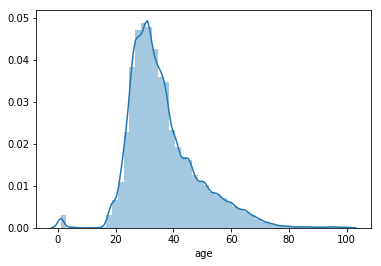

In [6]:
sns.distplot(processed_user.age)

In [17]:
drop_columns = [
    'country_destination', 
    'id', 
    'date_account_created', 
    'timestamp_first_active',
    'age'
]

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = processed_user.drop(columns=drop_columns)
y = processed_user.loc[:, 'country_destination']

# Select features
# kbest = SelectKBest(score_func=chi2, k=30)
# X_best = kbest.fit_transform(X, y)

# PCA
# from sklearn.decomposition import PCA
# pca = PCA(iterated_power='auto', n_components=30, random_state=None,
#   svd_solver='arpack', tol=0.0, whiten=False)
# pca.fit(X)
# X_pca = pca.transform(X)
X_scale = MinMaxScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier

def build_model():

    rfc = RandomForestClassifier()
#     model = SVC()
    xgb = XGBClassifier(n_jobs=5)
    cls = [
        ('rfc',rfc),
        ('xgb', xgb)
    ]
    # VotingClass
    model = VotingClassifier(estimators=cls, weights=[1, 4])
    
    return model

In [34]:
airbnb_model = build_model()

In [35]:
airbnb_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=[1, 4])

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, airbnb_model.predict(X_test))
print(report)

/home/dks/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       126
         CA       0.00      0.00      0.00       337
         DE       0.00      0.00      0.00       253
         ES       0.00      0.00      0.00       516
         FR       0.00      0.00      0.00      1131
         GB       0.00      0.00      0.00       510
         IT       0.00      0.00      0.00       588
        NDF       0.60      0.62      0.61     17091
         NL       0.00      0.00      0.00       184
         PT       0.00      0.00      0.00        46
         US       0.47      0.65      0.55     14563
      other       0.00      0.00      0.00      2294

avg / total       0.46      0.53      0.49     37639



/home/dks/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/dks/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
raw_test = pd.read_csv('./data/test_users.csv')

In [157]:
raw_test.date_first_booking.isnull().sum()
raw_test.shape

(62096, 15)

In [177]:
kbest.scores_
kbest.pvalues_
X.columns.values[kbest.get_support()]

array(['signup_flow', 'signup_method_basic', 'signup_method_facebook',
       'language_de', 'language_es', 'language_fr', 'language_it',
       'language_ko', 'language_nl', 'language_pt', 'language_ru',
       'language_zh', 'affiliate_channel_api',
       'affiliate_channel_content', 'affiliate_channel_direct',
       'affiliate_channel_other', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_provider_craigslist',
       'affiliate_provider_direct', 'affiliate_provider_facebook',
       'affiliate_provider_facebook-open-graph',
       'affiliate_provider_google', 'affiliate_provider_gsp',
       'affiliate_provider_meetup', 'affiliate_provider_other',
       'first_affiliate_tracked_omg',
       'first_affiliate_tracked_tracked-other',
       'first_affiliate_tracked_untracked', 'signup_app_Android',
       'signup_app_Moweb', 'signup_app_Web', 'signup_app_iOS',
       'first_device_type_Android Phone', 'first_device_type_Mac Desktop',
       'firs